分类数据的问题  
非常实用的方法是将Seaborn的分类图分为三类，将分类变量每个级别的每个观察结果显示出来，显示每个观察分布的抽象表示，以及应用统计估计显示的权重趋势和置信区间：

* 第一个包括函数swarmplot()和stripplot()
* 第二个包括函数boxplot()和violinplot()
* 第三个包括函数barplot()和pointplt()

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='whitegrid',color_codes=True)
np.random.seed(sum(map(ord,'categorical')))

In [3]:
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


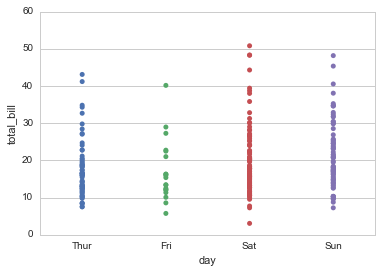

In [5]:
# 绘制tips的分类散点图，看关于day和total_bill分布的情况
sns.stripplot(x='day',y='total_bill',data=tips)

上图中确实看到不同数据的分类，但是看到散点图之间有重叠，很难看到数据的完整分布  
解决的办法可以使用一些随机的'抖动'来调整位置。

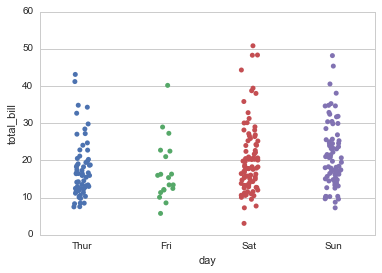

In [6]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

而针对上面的需要进行抖动处理的情况，swarmplot函数使用避免重叠点的算法将分类轴上的每个散点图

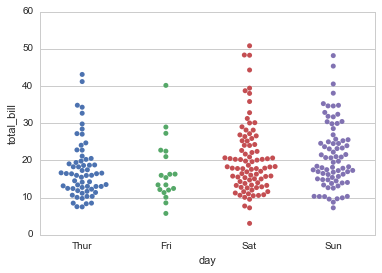

In [7]:
sns.swarmplot(x='day',y='total_bill',data=tips)

当然也可以传入hue参数添加多个嵌套的分类变量。

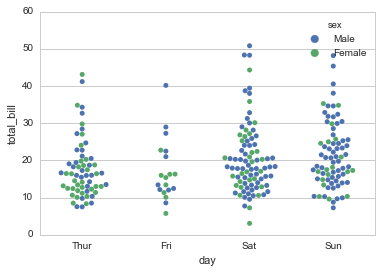

In [8]:
sns.swarmplot(x='day',y='total_bill',hue='sex',data=tips)

In [9]:
tips['size']

0      2
1      3
2      3
3      2
4      4
5      4
6      2
7      4
8      2
9      2
10     2
11     4
12     2
13     4
14     2
15     2
16     3
17     3
18     3
19     3
20     2
21     2
22     2
23     4
24     2
25     4
26     2
27     2
28     2
29     2
      ..
214    3
215    2
216    5
217    2
218    2
219    4
220    2
221    2
222    1
223    3
224    2
225    2
226    2
227    4
228    2
229    2
230    4
231    3
232    2
233    2
234    2
235    2
236    2
237    2
238    3
239    3
240    2
241    2
242    2
243    2
Name: size, dtype: int64

一般来说，Seaborn分类绘图功能视图从数据中推断类别的顺序。如果数据中有一个pandas分类数据类型，那么类别的默认顺序可以在那里设置。 对于其他数据类型，字符串类型的类别将按照它们在DataFrame中显示的顺序进行绘制，但是数组类别将被排序：

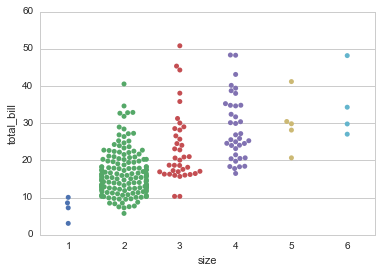

In [10]:
sns.swarmplot(x='size',y='total_bill',data=tips)

使用这些图，将分类变量放在垂直轴上是非常有用的（当类别名称相对较长或有很多类别时，这一点特别有用）。 您可以使用orient关键字强制定向，但通常可以从传递给x和/或y的变量的数据类型推断绘图方向：

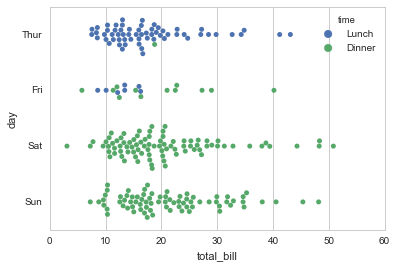

In [11]:
sns.swarmplot(x='total_bill',y='day',hue='time',data=tips)

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 分类内的观测分布

分类散点图固然简单实用，但在某些特定的的情况下，他们可以提供的值的分布信息会变得及其有限（并不明晰）。 有几种方式可以方便的解决这个问题，在类别之间进行简单比较并汇总信息，我们快速讨论并比较一些适合这类数据观测的函数。

### 箱线图

第一个是熟悉的boxplot()。这种图形显示了分布的三个四分位值与极值。“晶须”延伸到低于和低四分位数的1.5 IQR内的点，然后独立显示落在该范围之外的观测值。 重要的是，这意味着boxplot中的每个值的显示都对应于数据中的实际观察值：

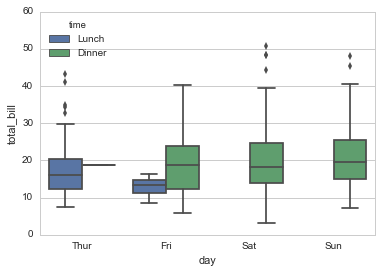

In [13]:
sns.boxplot(x='day',y='total_bill',hue='time',data=tips)

### 提琴图

不同的方法是一个violinplot()，它结合了箱体图和分布教程中描述的核心密度估计过程：

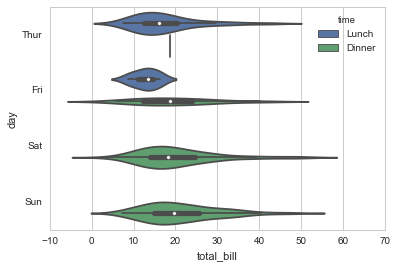

In [14]:
sns.violinplot(x='total_bill',y='day',hue='time',data=tips)

这种方法使用核密度估计来更好地描述值的分布。此外，小提琴内还显示了箱体四分位数和晶须值。由于小提琴使用KDE，还有一些其他可以调整的参数，相对于简单的boxplot增加了一些复杂性：

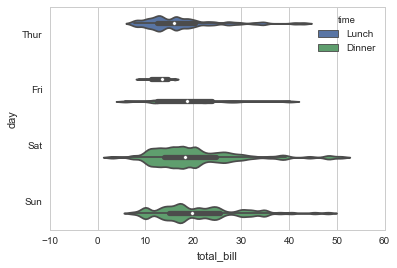

In [15]:
sns.violinplot(x='total_bill',y='day',hue='time',data=tips,bw=.1,scale='count',scale_hue=False)

当色调参数只有两个级别时，也可以传入参数split至violinplot()，这样可以更有效地利用空间：

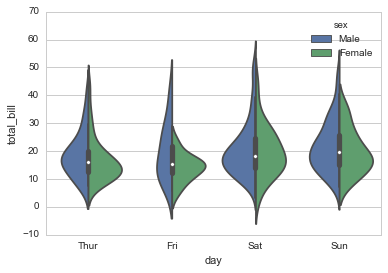

In [16]:
sns.violinplot(x='day',y='total_bill',hue='sex',data=tips,split=True)

最后，在绘制提琴图的时候有几个选项，包括显示每个人的观察结果而不是总结框图值的方法：

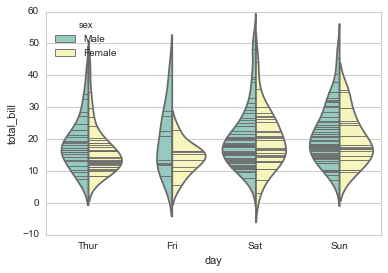

In [18]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

## 类别内的统计估计

通常，不是显示每个类别中的分布，你可能希望显示值的集中趋势。 Seaborn有两种显示此信息的主要方法，但重要的是，这些功能的基本API与上述相同。（未禾：这是多么令人愉悦的事情）

In [21]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
set(titanic['survived'])

{0, 1}

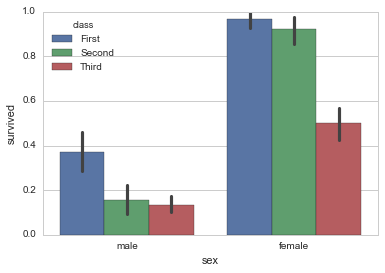

In [24]:
# 在titanic数据集上，显示sex,survived,class三类
sns.barplot(x='sex',y='survived',hue='class',data=titanic)

In [25]:
set(titanic['deck'])

{nan, 'A', 'B', 'C', 'D', 'E', 'F', 'G'}

条形图的特殊情况是当您想要显示每个类别中的观察次数，而不是计算第二个变量的统计量。这类似于分类而不是定量变量的直方图。在Seaborn中，使用countplot()函数很容易绘制：

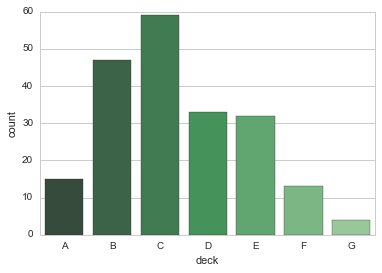

In [26]:
sns.countplot(x='deck',data=titanic,palette='Greens_d')

可以使用上面讨论的所有选项来调用barplot()和countplot()，以及在每个函数的详细文档中的其他选项：

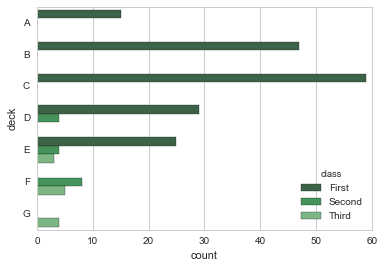

In [27]:
sns.countplot(y='deck',hue='class',data=titanic,palette='Greens_d')

## 点图

pointplot()函数提供了可视化相同信息的另一种风格。该函数还对另一轴的高度估计值进行编码，而不是显示一个完整的柱型，它只绘制点估计和置信区间。另外，点图连接相同hue类别的点。这使得很容易看出主要关系如何随着第二个变量的变化而变化，因为你的眼睛很好地收集斜率的差异：

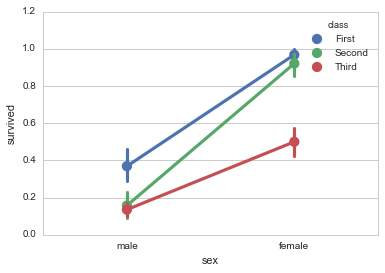

In [28]:
sns.pointplot(x='sex',y='survived',hue='class',data=titanic)

为了使能够在黑白中重现的图形，可以使用不同的标记和线条样式来展示不同hue类别的层次:

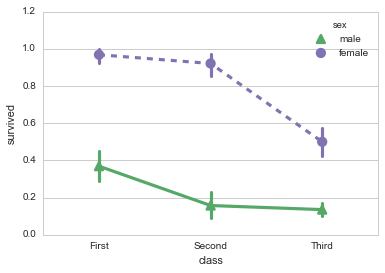

In [29]:
sns.pointplot(x='class',y='survived',hue='sex',data=titanic,palette={'male':'g','female':'m'},
             markers=['^','o'],linestyles=['-','--'])

## 绘制“宽格式”数据

虽然使用“长格式”或“整洁”数据是优选的，但是这些功能也可以应用于各种格式的“宽格式”数据，包括pandas DataFrame或二维numpy数组阵列。这些对象应该直接传递给数据参数：

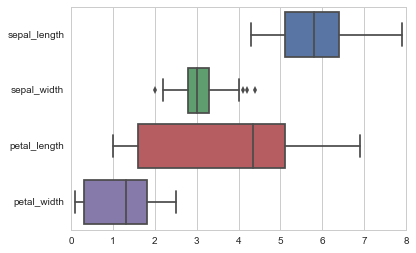

In [30]:
sns.boxplot(data=iris,orient='h')

此外，这些函数接受Pandas或numpy对象的向量，而不是DataFrame中的变量

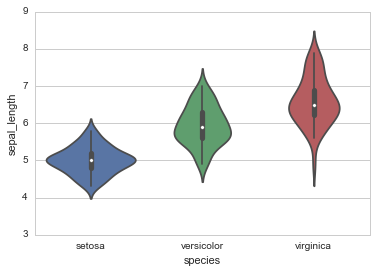

In [31]:
sns.violinplot(x=iris.species,y=iris.sepal_length)

为了控制由上述功能制作的图形的大小和形状，您必须使用matplotlib命令自己设置图形。 当然，这也意味着这些图块可以和其他种类的图块一起在一个多面板的绘制中共存：

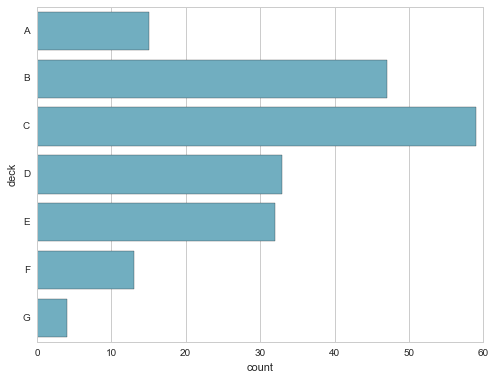

In [32]:
f,ax = plt.subplots(figsize=(8,6))
sns.countplot(y='deck',data=titanic,color='c')

## 绘制多层面板分类图

正如我们上面提到的，有两种方法可以在Seaborn中绘制分类图。与回归图中的二元性相似，您可以使用上面介绍的函数，也可以使用更高级别的函数factorplot()，将这些函数与FacetGrid()相结合，通过这个图形的更大的结构来增加展示其他类别的能力。 默认情况下，factorplot()产生一个pairplot()：

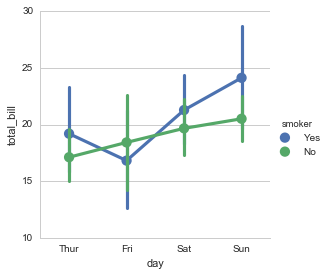

In [33]:
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips)

然而，kind参数可以让您选择以上讨论的任何种类的图：

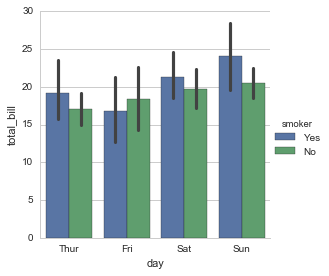

In [34]:
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips,kind='bar')

使用factorplot()的主要优点是很容易调用"facet"展开更多其他分类变量：

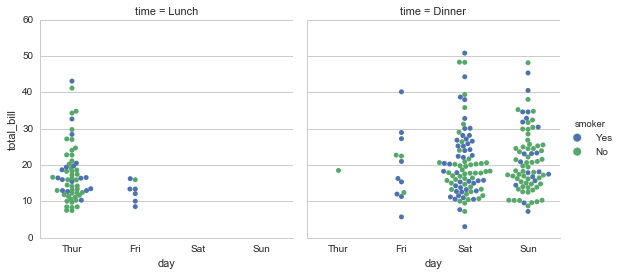

In [35]:
sns.factorplot(x='day',y='total_bill',hue='smoker',col='time',data=tips,kind='swarm')

任何一种图形都可以画出来。基于FacetGrid的工作原理，要更改图形的大小和形状，需要指定适用于每个方面的size和aspect参数：

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


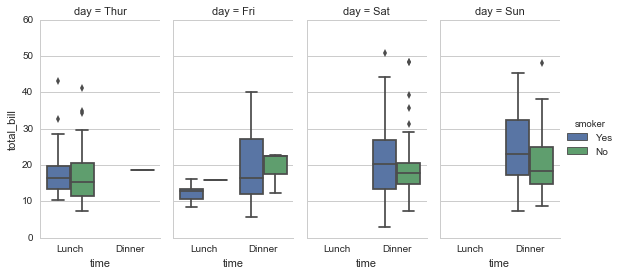

In [38]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

重要的是要注意，你也可以直接使用boxplot()和FacetGrid来制作这个图。但是，必须特别注意确保分类变量的顺序在每个方面实施，方法是使用具有Categorical数据类型的数据或通过命令和hue_order。

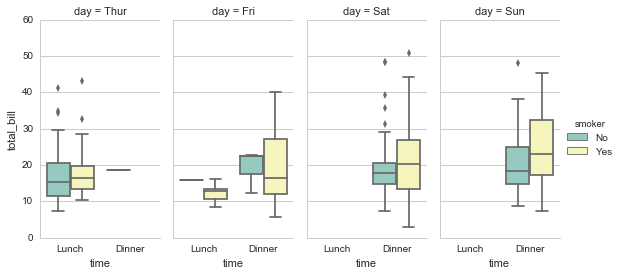

In [40]:
sns.factorplot(x="time", y="total_bill", hue="smoker",hue_order=["No","Yes"]
               ,col="day", data=tips, kind="box", size=4, aspect=.5,
              palette="Set3");

由于分类图的广义API，它们应该很容易应用于其他更复杂的上下文。 例如，它们可以轻松地与PairGrid结合，以显示多个不同变量之间的分类关系：

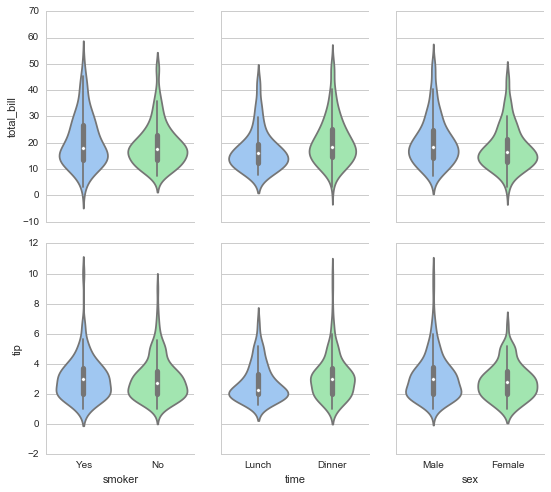

In [41]:
g = sns.PairGrid(tips,x_vars=['smoker','time','sex'],
                 y_vars=['total_bill','tip'],
                 aspect=0.75,size=3.5)
g.map(sns.violinplot,palette='pastel')